# New Section

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [5]:
train_dir = '/content/train'
test_dir = '/content/test'



In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # 4 classes for the soil types
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,716 (72.62 MB)

 Trainable params: 19,035,716 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Define the correct order of classes
class_names = ['alluvial soil', 'black soil', 'clay soil', 'red soil']

# Update the train_generator and test_generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical',
    classes=class_names  # Specify the class order
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    classes=class_names  # Specify the class order
)


Found 1215 images belonging to 4 classes.
Found 340 images belonging to 4 classes.


In [11]:
print(train_generator.class_indices)


{'alluvial soil': 0, 'black soil': 1, 'clay soil': 2, 'red soil': 3}


In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,  # Adjust epochs if needed
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8650 - loss: 0.3142 - val_accuracy: 0.8875 - val_loss: 0.2711
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 244ms/step - accuracy: 0.7812 - loss: 0.4048 - val_accuracy: 0.8844 - val_loss: 0.2866
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8809 - loss: 0.2857 - val_accuracy: 0.8656 - val_loss: 0.2756
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 227ms/step - accuracy: 0.8438 - loss: 0.3023 - val_accuracy: 0.8750 - val_loss: 0.2662
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.8924 - loss: 0.2726 - val_accuracy: 0.9094 - val_loss: 0.2540


In [13]:
print(f"Train generator sample count: {train_generator.samples}")
print(f"Test generator sample count: {test_generator.samples}")


Train generator sample count: 1215
Test generator sample count: 340


In [29]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_acc}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 461ms/step - accuracy: 0.9263 - loss: 0.2247
Test Accuracy: 0.9156249761581421


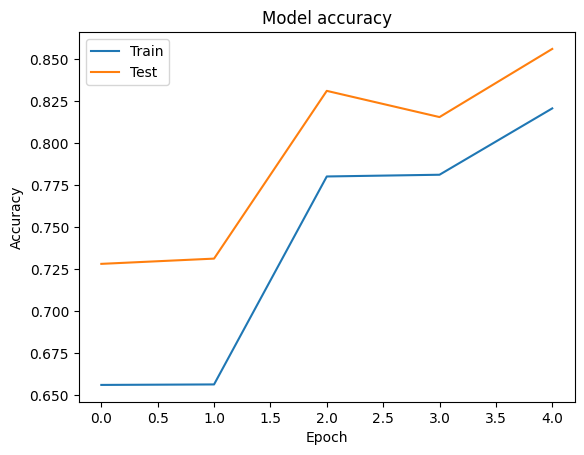

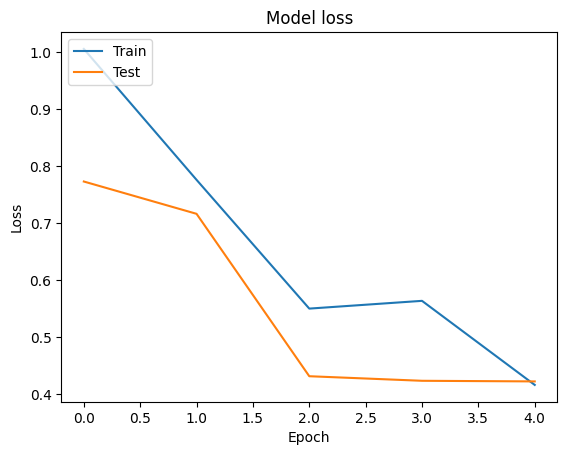

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [16]:
model.save("soil_prediction.keras")

In [17]:
!pip uninstall tensorflow tensorflowjs
!pip install tensorflow tensorflowjs

Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/lib/python3.11/dist-packages/tensorflow-2.19.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/tensorflow/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.11/dist-packages/tensorflow/include/external/curl/lib/curl_ntlm_wb.h
    /usr/local/lib/python3.11/dist-packages/tensorflow/include/external/curl/lib/curl_path.h
    /usr/local/lib/python3.11/dist-packages/tensorflow/include/external/double_conversion/double-conversion/bignum-dtoa.h
    /usr/local/lib/python3.11/dist-packages/tensorflow/include/external/double_conversion/double-conversion/bignum.h
    /usr/local/lib/python3.11/dist-packages/tensorflow/include/external/double_conversion/double-co

In [21]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model("soil_prediction.keras")

In [18]:
import tensorflowjs as tfjs
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('soil_prediction.keras')

# Convert the model to TensorFlow.js format
tfjs.converters.save_keras_model(model, 'model-tfjs')

failed to lookup keras version from the file,
    this is likely a weight only file


In [27]:
import cv2
import numpy as np

# Define class names (same as training)
class_names = ['alluvial soil', 'black soil', 'clay soil', 'red soil']

# Load and preprocess an image
def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Read the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (150, 150))  # Resize to match model input
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Expand dimensions for model input
    return img

# Example usage
image_path = "/content/test/black soil/Black_1.jpg"
img = preprocess_image(image_path)


In [28]:
# Predict the class
predictions = model.predict(img)
predicted_class = np.argmax(predictions)  # Get the class index
predicted_label = class_names[predicted_class]  # Get the class label

print(f"Predicted Soil Type: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Soil Type: black soil
